In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel("./data_airline_reviews_1.xlsx")

In [3]:
df

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,Alitalia,9.0,D Cerulli,30th June 2014,Rome to Nice and return. We took off 10 mins e...,NaN,NaN,Economy Class,NaN,NaN,4.0,5.0,3.0,NaN,NaN,5.0,yes
39996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39997,Alitalia,NaN,N Yanaky,25th June 2014,My parents and I were returning from a lovely ...,NaN,NaN,Economy Class,NaN,NaN,1.0,3.0,1.0,1.0,NaN,3.0,no
39998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(40000, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          20000 non-null  object 
 1   overall          19680 non-null  float64
 2   author           20000 non-null  object 
 3   review_date      20000 non-null  object 
 4   customer_review  20000 non-null  object 
 5   aircraft         6283 non-null   object 
 6   traveller_type   13311 non-null  object 
 7   cabin            19289 non-null  object 
 8   route            13301 non-null  object 
 9   date_flown       13280 non-null  object 
 10  seat_comfort     18857 non-null  float64
 11  cabin_service    18876 non-null  float64
 12  food_bev         16916 non-null  float64
 13  entertainment    14733 non-null  float64
 14  ground_service   13214 non-null  float64
 15  value_for_money  19429 non-null  float64
 16  recommended      19497 non-null  object 
dtypes: float64(7

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
overall,19680.0,4.988211,3.512952,1.0,1.0,5.0,9.0,10.0
seat_comfort,18857.0,2.976826,1.436701,1.0,2.0,3.0,4.0,5.0
cabin_service,18876.0,3.167355,1.569719,1.0,2.0,3.0,5.0,5.0
food_bev,16916.0,2.971743,1.483867,1.0,1.0,3.0,4.0,5.0
entertainment,14733.0,3.061562,1.522952,1.0,1.0,3.0,4.0,5.0
ground_service,13214.0,2.630922,1.611870,1.0,1.0,2.0,4.0,5.0
value_for_money,19429.0,2.883216,1.582083,1.0,1.0,3.0,4.0,5.0


In [7]:
df.duplicated().sum()

np.int64(20189)

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.shape

(19811, 17)

In [11]:
df.isnull().sum()

airline                1
overall              315
author                 1
review_date            1
customer_review        1
aircraft           13528
traveller_type      6501
cabin                707
route               6511
date_flown          6532
seat_comfort        1141
cabin_service       1123
food_bev            3080
entertainment       5256
ground_service      6598
value_for_money      569
recommended          502
dtype: int64

In [12]:
df.isnull().sum()/df.shape[0]*100

airline             0.005048
overall             1.590026
author              0.005048
review_date         0.005048
customer_review     0.005048
aircraft           68.285296
traveller_type     32.815103
cabin               3.568724
route              32.865580
date_flown         32.971581
seat_comfort        5.759427
cabin_service       5.668568
food_bev           15.546918
entertainment      26.530715
ground_service     33.304730
value_for_money     2.872142
recommended         2.533946
dtype: float64

In [13]:
def drop_null(df):
    null_percentage=df.isnull().sum()/df.shape[0]*100
    columns_to_drop=[col for col in df.columns if null_percentage[col]>25.00]
    df.drop(columns= columns_to_drop,inplace=True)
    return df

In [14]:
drop_null(df)

,airline,overall,author,review_date,customer_review,cabin,seat_comfort,cabin_service,food_bev,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,Economy Class,4.0,5.0,4.0,4.0,yes
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,Economy Class,4.0,1.0,1.0,1.0,no
5,Turkish Airlines,3.0,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,Economy Class,1.0,4.0,1.0,2.0,no
7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,Economy Class,4.0,5.0,5.0,5.0,yes
...,...,...,...,...,...,...,...,...,...,...,...
39991,Alitalia,7.0,T Matava,6th July 2014,AZ703 IST-FCO connecting onto AZ 630 FCO-MIA B...,NaN,NaN,NaN,NaN,NaN,NaN
39993,Alitalia,10.0,S Kesavan,30th June 2014,Flew from Rome to Lamezia Terme and back. A mo...,Economy Class,4.0,5.0,5.0,5.0,yes
39995,Alitalia,9.0,D Cerulli,30th June 2014,Rome to Nice and return. We took off 10 mins e...,Economy Class,4.0,5.0,3.0,5.0,yes
39997,Alitalia,NaN,N Yanaky,25th June 2014,My parents and I were returning from a lovely ...,Economy Class,1.0,3.0,1.0,3.0,no


In [15]:
df.isnull().sum()/df.shape[0]*100

airline             0.005048
overall             1.590026
author              0.005048
review_date         0.005048
customer_review     0.005048
cabin               3.568724
seat_comfort        5.759427
cabin_service       5.668568
food_bev           15.546918
value_for_money     2.872142
recommended         2.533946
dtype: float64

In [16]:
df.dropna(axis=1,how="all",inplace=True)

In [17]:
df.dropna(axis=0,how="all",inplace=True)

In [18]:
df.shape

(19810, 11)

In [19]:
type(df)

pandas.core.frame.DataFrame

In [20]:
list(df.columns)

['airline',
 'overall',
 'author',
 'review_date',
 'customer_review',
 'cabin',
 'seat_comfort',
 'cabin_service',
 'food_bev',
 'value_for_money',
 'recommended']

In [21]:
df.dtypes


airline             object
overall            float64
author              object
review_date         object
customer_review     object
cabin               object
seat_comfort       float64
cabin_service      float64
food_bev           float64
value_for_money    float64
recommended         object
dtype: object

In [22]:
df.head

<bound method NDFrame.head of                 airline  overall               author     review_date  \
1      Turkish Airlines      7.0  Christopher Hackley    8th May 2019   
3      Turkish Airlines      2.0        Adriana Pisoi    7th May 2019   
5      Turkish Airlines      3.0            M Galerko    7th May 2019   
7      Turkish Airlines     10.0          Zeshan Shah    6th May 2019   
9      Turkish Airlines      1.0           Pooja Jain    6th May 2019   
...                 ...      ...                  ...             ...   
39991          Alitalia      7.0             T Matava   6th July 2014   
39993          Alitalia     10.0            S Kesavan  30th June 2014   
39995          Alitalia      9.0            D Cerulli  30th June 2014   
39997          Alitalia      NaN             N Yanaky  25th June 2014   
39999          Alitalia      NaN       Giovanni Rossi  20th June 2014   

                                         customer_review          cabin  \
1      âœ… Trip Ve

In [23]:
df['review_date']=pd.to_datetime(df['review_date'],errors='coerce')

In [24]:
df.dtypes

airline                    object
overall                   float64
author                     object
review_date        datetime64[ns]
customer_review            object
cabin                      object
seat_comfort              float64
cabin_service             float64
food_bev                  float64
value_for_money           float64
recommended                object
dtype: object

In [25]:
df["author"].value_counts()

author
Anders Pedersen      49
T Eldem              45
R Sanyal             32
Tercon Bojan         24
Peter Pomeranze      23
                     ..
Marios Kourkoulos     1
A Elskary             1
A Rowe                1
A Martell             1
Badr Ibrahim          1
Name: count, Length: 16038, dtype: int64

In [26]:
! pip install textblob


[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
from textblob import TextBlob
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity
df['sentiment_score']=df['customer_review'].apply(get_sentiment)
print("Sentiment analysis applied. Sentiment score added to dataset")

Sentiment analysis applied. Sentiment score added to dataset


In [28]:
df.head(2)

,airline,overall,author,review_date,customer_review,cabin,seat_comfort,cabin_service,food_bev,value_for_money,recommended,sentiment_score
1,Turkish Airlines,7.0,Christopher Hackley,2019-05-08,âœ… Trip Verified | London to Izmir via Istanb...,Economy Class,4.0,5.0,4.0,4.0,yes,0.260263
3,Turkish Airlines,2.0,Adriana Pisoi,2019-05-07,âœ… Trip Verified | Istanbul to Bucharest. We ...,Economy Class,4.0,1.0,1.0,1.0,no,0.116667


In [29]:
df.drop(columns=['customer_review'],inplace=True)

In [30]:
df.drop(columns=['author','review_date'],inplace=True)

In [31]:
df['airline'].value_counts()

airline
American Airlines            2846
United Airlines              2774
Emirates                     1763
Delta Air Lines              1535
Turkish Airlines             1478
Qatar Airways                1430
Lufthansa                    1401
Air Canada                   1272
KLM Royal Dutch Airlines      969
Southwest Airlines            909
Jetblue Airways               642
Air New Zealand               608
Aegean Airlines               530
Aeroflot Russian Airlines     501
Aeromexico                    437
Alitalia                      405
Virgin America                310
Name: count, dtype: int64

In [32]:
df['cabin'].value_counts()

cabin
Economy Class      14352
Business Class      3141
Premium Economy      853
First Class          758
Name: count, dtype: int64

In [33]:
df.isnull().sum()

airline               0
overall             314
cabin               706
seat_comfort       1140
cabin_service      1122
food_bev           3079
value_for_money     568
recommended         501
sentiment_score       0
dtype: int64

In [34]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
airline,19810,17,American Airlines,2846,NaN,NaN,NaN,NaN,NaN,NaN,NaN
overall,19496.0,NaN,NaN,NaN,4.986561,3.513638,1.0,1.0,5.0,9.0,10.0
cabin,19104,4,Economy Class,14352,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seat_comfort,18670.0,NaN,NaN,NaN,2.975201,1.437272,1.0,2.0,3.0,4.0,5.0
cabin_service,18688.0,NaN,NaN,NaN,3.166738,1.569674,1.0,2.0,3.0,5.0,5.0
food_bev,16731.0,NaN,NaN,NaN,2.972088,1.484246,1.0,1.0,3.0,4.0,5.0
value_for_money,19242.0,NaN,NaN,NaN,2.881561,1.58348,1.0,1.0,3.0,4.0,5.0
recommended,19309,2,no,10470,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sentiment_score,19810.0,NaN,NaN,NaN,0.110325,0.207027,-1.0,-0.020186,0.1,0.243927,1.0


In [35]:
df['overall'].fillna(df.overall.mean(),inplace=True)
df['cabin'].fillna(df.cabin.mode()[0],inplace=True)
df['seat_comfort'].fillna(df.seat_comfort.mean(),inplace=True)
df['cabin_service'].fillna(df.cabin_service.mean(),inplace=True)
df['food_bev'].fillna(df.food_bev.mean(),inplace=True)
df['value_for_money'].fillna(df.value_for_money.mean(),inplace=True)
df['recommended'].fillna(df.recommended.mode()[0],inplace=True)

In [36]:
df.isnull().sum()

airline            0
overall            0
cabin              0
seat_comfort       0
cabin_service      0
food_bev           0
value_for_money    0
recommended        0
sentiment_score    0
dtype: int64

In [37]:
df.head(2)

,airline,overall,cabin,seat_comfort,cabin_service,food_bev,value_for_money,recommended,sentiment_score
1,Turkish Airlines,7.0,Economy Class,4.0,5.0,4.0,4.0,yes,0.260263
3,Turkish Airlines,2.0,Economy Class,4.0,1.0,1.0,1.0,no,0.116667


In [38]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 6 numerical features : ['overall', 'seat_comfort', 'cabin_service', 'food_bev', 'value_for_money', 'sentiment_score']

We have 3 categorical features : ['airline', 'cabin', 'recommended']


In [39]:
for col in categorical_features:
    print(df[col].value_counts(normalize=True)*100)
    print('--------------------------')

airline
American Airlines            14.366482
United Airlines              14.003029
Emirates                      8.899546
Delta Air Lines               7.748612
Turkish Airlines              7.460878
Qatar Airways                 7.218576
Lufthansa                     7.072186
Air Canada                    6.420999
KLM Royal Dutch Airlines      4.891469
Southwest Airlines            4.588592
Jetblue Airways               3.240787
Air New Zealand               3.069157
Aegean Airlines               2.675416
Aeroflot Russian Airlines     2.529026
Aeromexico                    2.205957
Alitalia                      2.044422
Virgin America                1.564866
Name: proportion, dtype: float64
--------------------------
cabin
Economy Class      76.012115
Business Class     15.855628
Premium Economy     4.305906
First Class         3.826350
Name: proportion, dtype: float64
--------------------------
recommended
no     55.381121
yes    44.618879
Name: proportion, dtype: float64
--------

In [40]:
# univariate Analysis

Univariate Analysis


Numrical Features

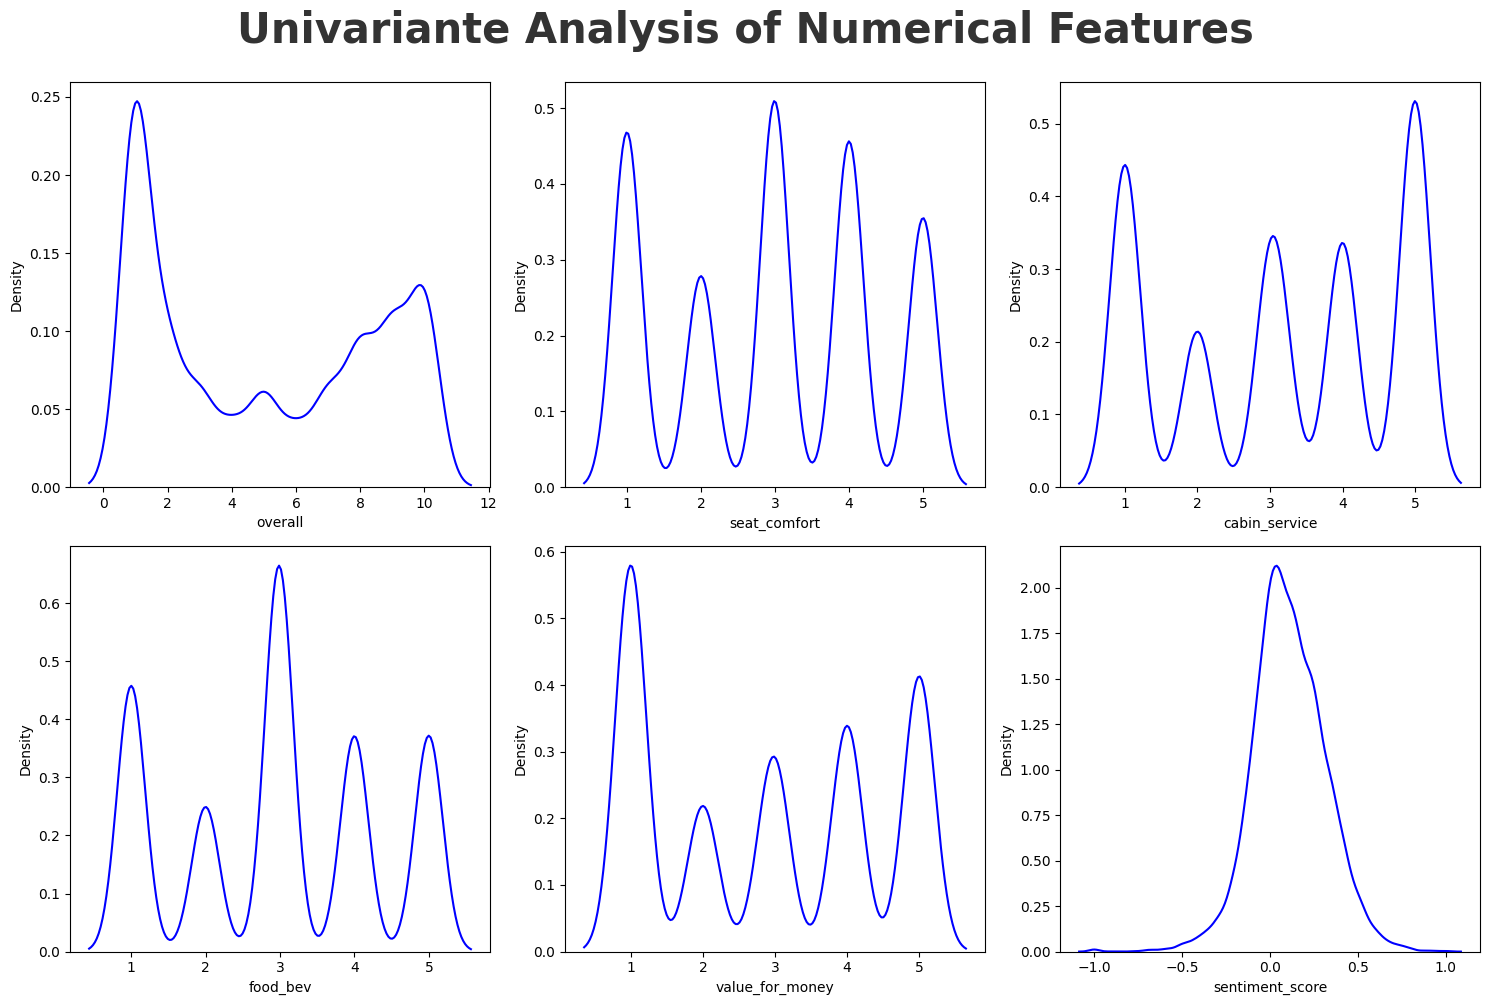

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
n_features=len(numeric_features)
n_cols=3
n_rows=int(np.ceil(n_features/n_cols))

plt.figure(figsize=(15,5*n_rows))
plt.suptitle('Univariante Analysis of Numerical Features', fontsize=30,fontweight='bold',alpha=0.8,y=1.)
for i in range(n_features):
    plt.subplot(n_rows,n_cols,i+1)
    sns.kdeplot(x=df[numeric_features[i]],color='blue')
    plt.xlabel(numeric_features[i])
plt.tight_layout()
plt.show()

Categorical Features


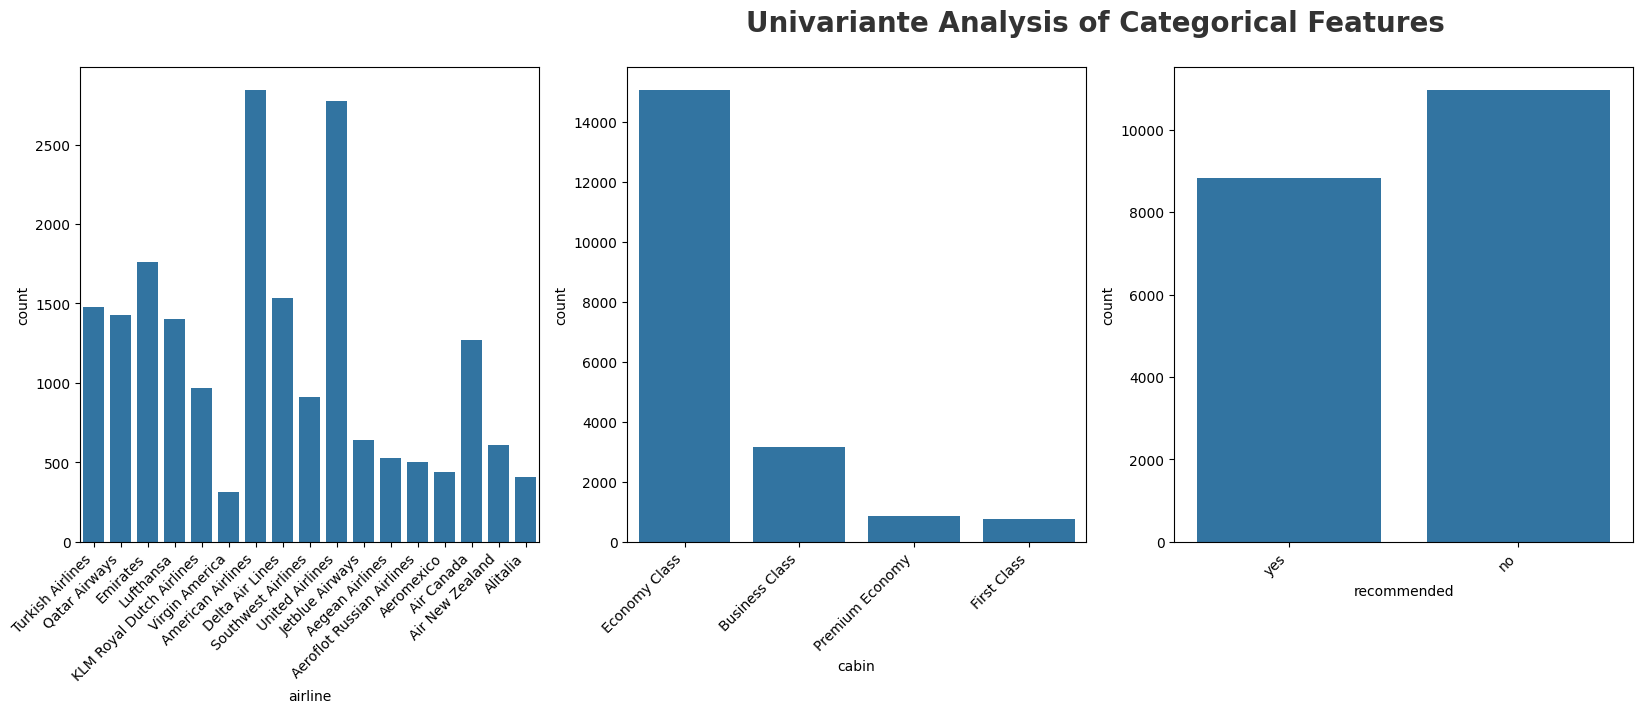

In [42]:
plt.figure(figsize=(22,25))
plt.suptitle('Univariante Analysis of Categorical Features', fontsize=20,fontweight='bold',alpha=.8,y=1.)
for i in range(0,len(categorical_features)):
    plt.subplot(4,4,i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.xticks(rotation=45,ha='right')
    plt.tight_layout()

In [43]:
discrete_features=[feature for feature in numeric_features if len(df[feature].unique())<=25]
continuous_features=[feature for feature in numeric_features if len(df[feature].unique())>25]
print('We have {} dicrete features : {}'.format(len(discrete_features),discrete_features))
print('\nWe have {} continuous_features : {}'.format(len(continuous_features),continuous_features))

We have 5 dicrete features : ['overall', 'seat_comfort', 'cabin_service', 'food_bev', 'value_for_money']

We have 1 continuous_features : ['sentiment_score']


Check Multicollinearity for categorical features


In [44]:
from scipy.stats import chi2_contingency
chi2_test=[]
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['recommended'],df[feature]))[1]<0.05:
        chi2_test.append('reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result=pd.DataFrame(data=[categorical_features,chi2_test]).T
result.columns=['Column','Hypothesis Result']
result

,Column,Hypothesis Result
0,airline,reject Null Hypothesis
1,cabin,reject Null Hypothesis
2,recommended,reject Null Hypothesis


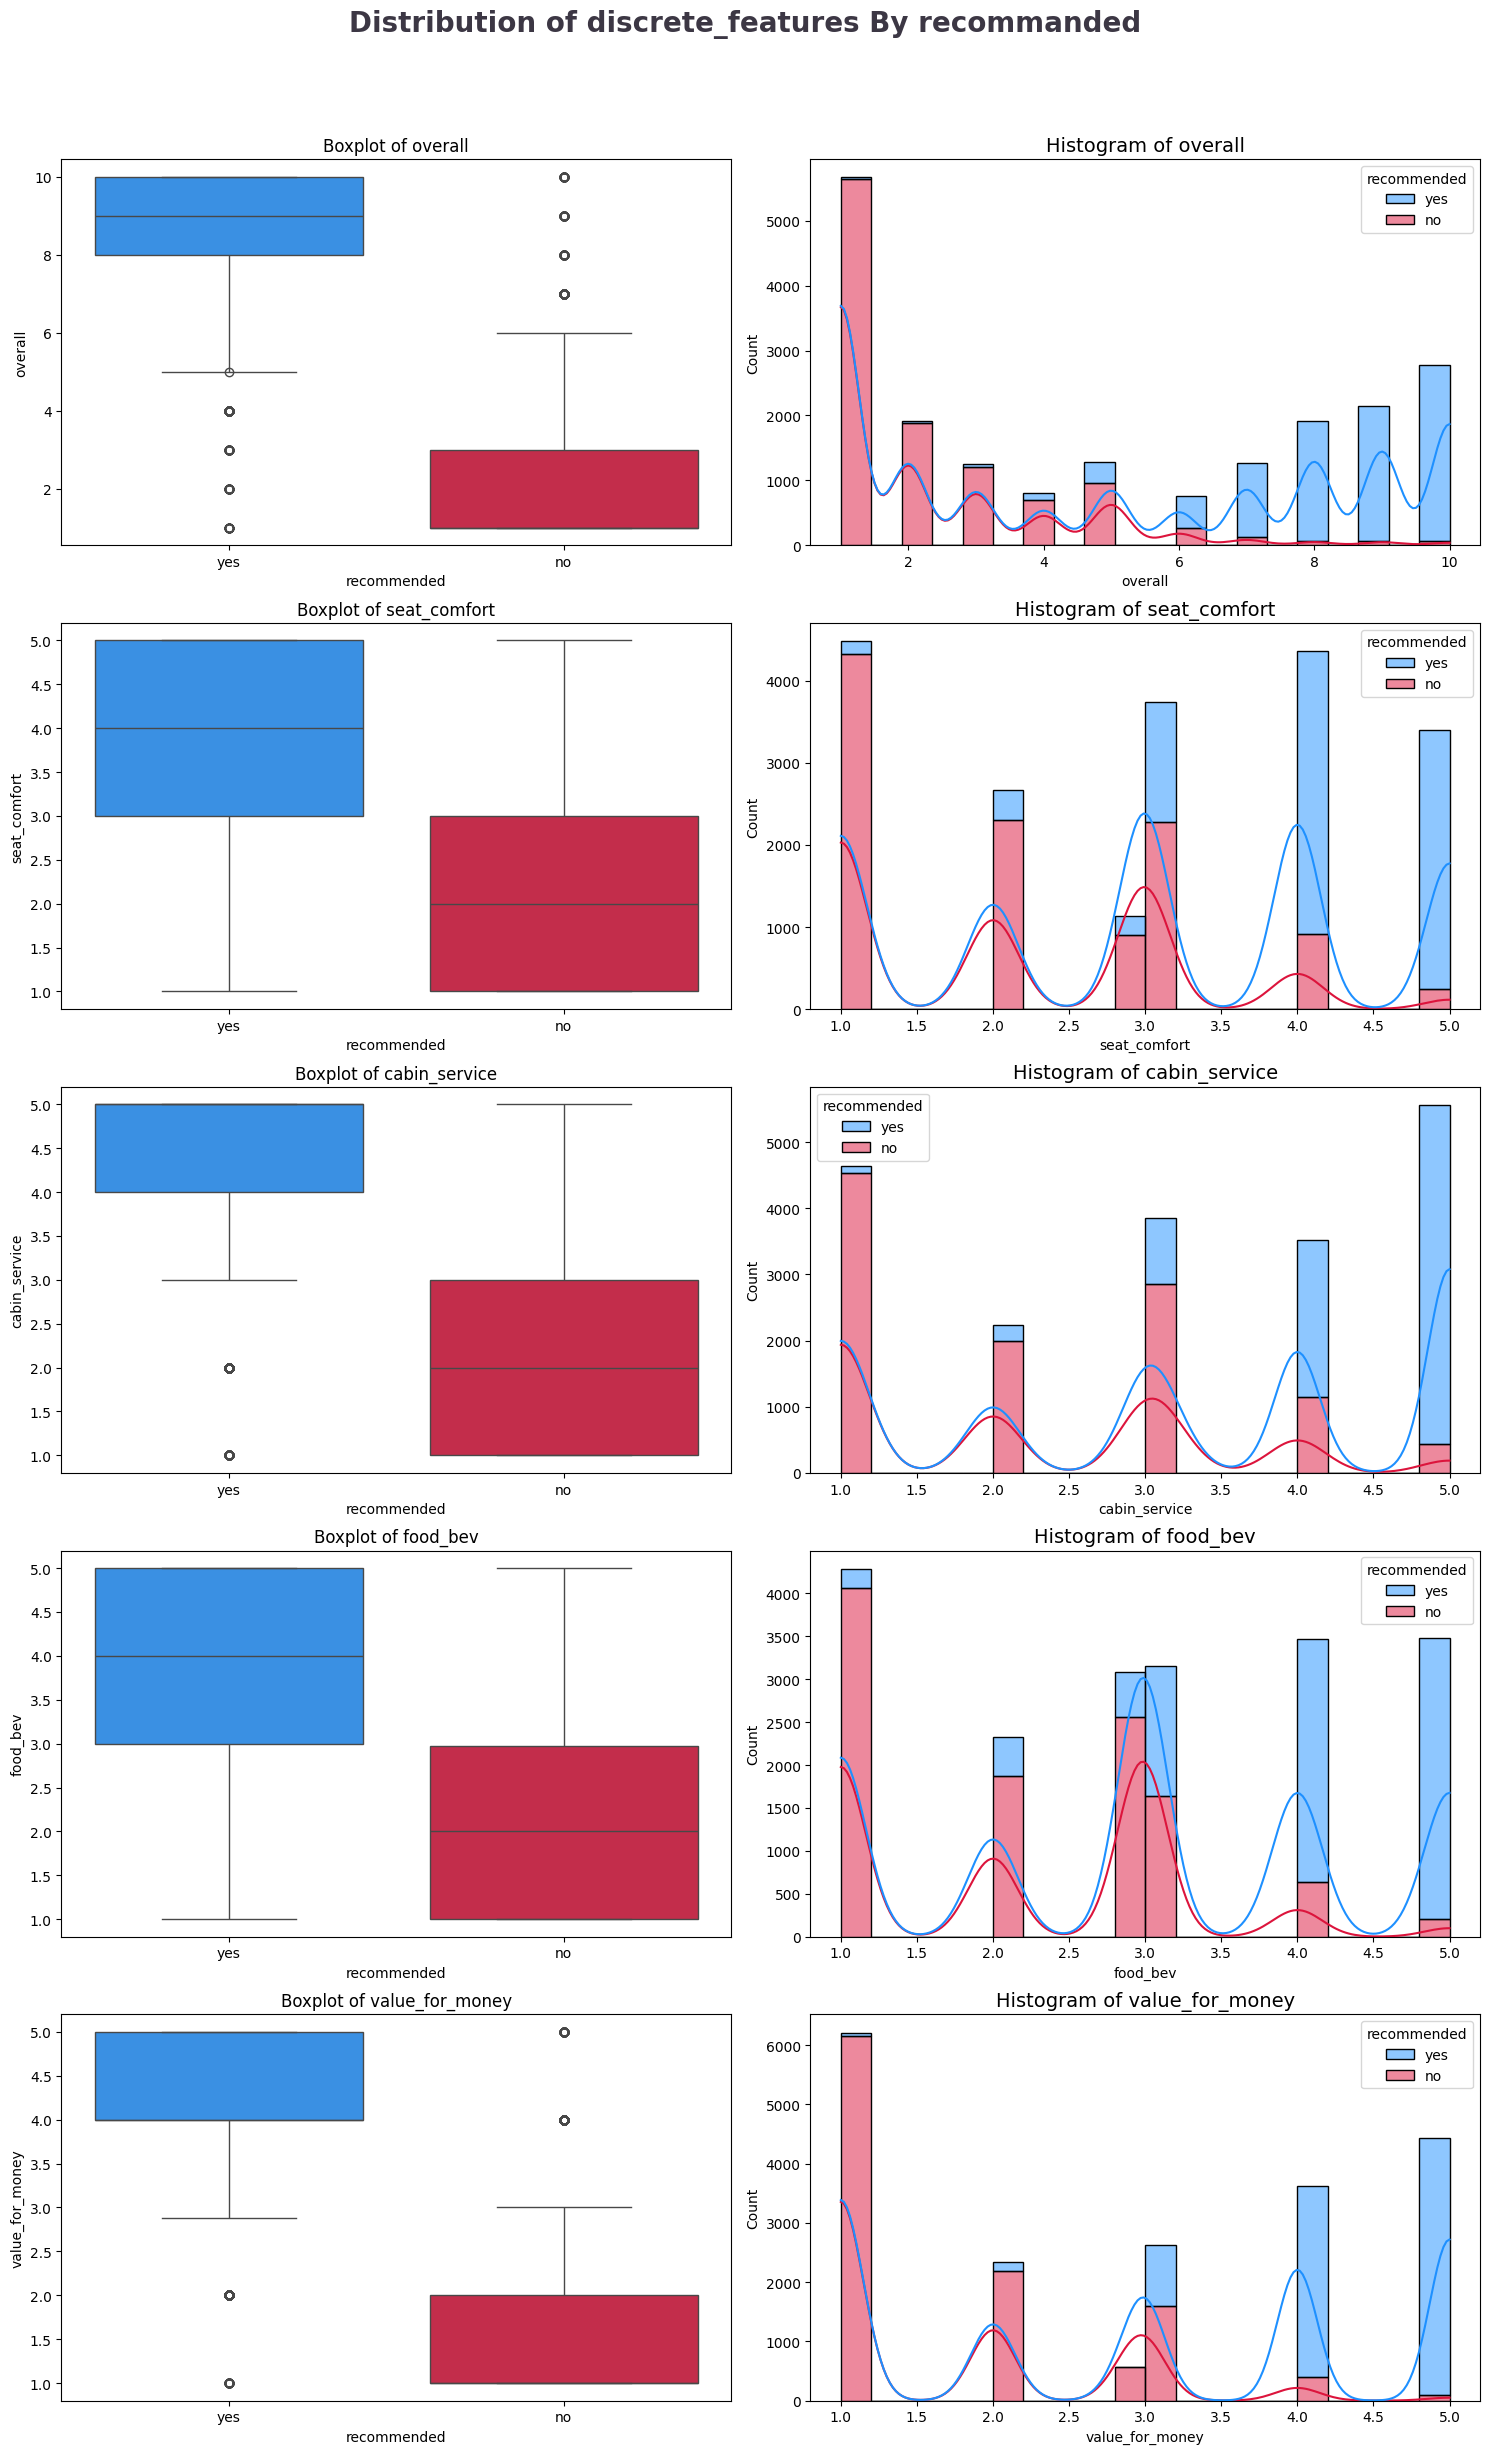

In [45]:
clr1=['#1E90FF','#DC143C']
num_rows=5
num_cols=math.ceil(len(discrete_features)/num_rows)
fig_width=15
fig_height=5*num_rows
fig,ax=plt.subplots(num_rows,2,figsize=(fig_width,fig_height))
fig.suptitle('Distribution of discrete_features By recommanded',color='#3C3744',fontsize=20,fontweight='bold',ha='center')
for i,col in enumerate(discrete_features):
    if i<num_rows*2:
        row_index=i%num_rows
        col_index=i//num_rows
        sns.boxplot(data=df,x='recommended',y=col,palette=clr1,ax=ax[row_index,0])
        ax[row_index,0].set_title(f'Boxplot of {col}',fontsize=12)
        sns.histplot(data=df,x=col,hue='recommended',bins=20,kde=True,multiple='stack',palette=clr1,ax=ax[row_index,1])
        ax[row_index,1].set_title(f'Histogram of {col}',fontsize=14)
    else:
        break

for i in range(len(discrete_features),num_rows*2):
    ax[i//2,i%2].axis('on')
fig.tight_layout()
fig.subplots_adjust(top=0.92)

    



In [46]:
continuous_features=[feature for feature in numeric_features if len(df[feature].unique())>=10]
print('Num of continues features :',continuous_features)

Num of continues features : ['overall', 'sentiment_score']


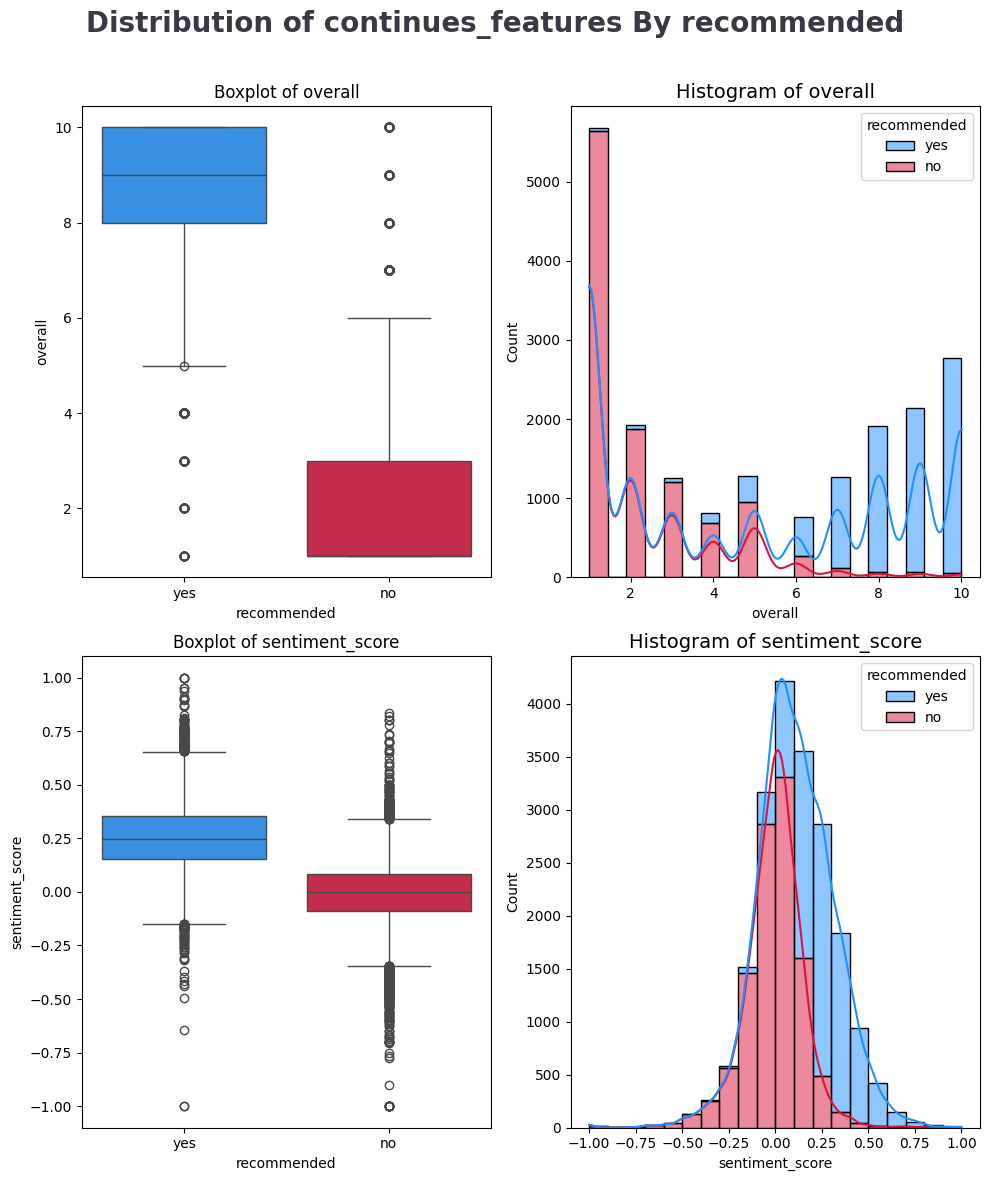

In [47]:
clr1=['#1E90FF','#DC143C']
num_rows=2
fig,ax=plt.subplots(num_rows,2,figsize=(10,12))
fig.suptitle('Distribution of continues_features By recommended',color='#3C3744',fontsize=20,fontweight='bold',ha='center')
for i , col in enumerate((continuous_features)):
    sns.boxplot(data=df,x='recommended',y=col,palette=clr1,ax=ax[i,0])
    ax[i,0].set_title(f'Boxplot of {col}',fontsize=12)
    sns.histplot(data=df,x=col,hue='recommended',bins=20,kde=True,multiple='stack',palette=clr1,ax=ax[i,1])
    ax[i,1].set_title(f'Histogram of {col}', fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=0.90)

    

In [48]:
df.recommended.value_counts()

recommended
no     10971
yes     8839
Name: count, dtype: int64

In [49]:
df.recommended.value_counts(normalize=True)*100

recommended
no     55.381121
yes    44.618879
Name: proportion, dtype: float64

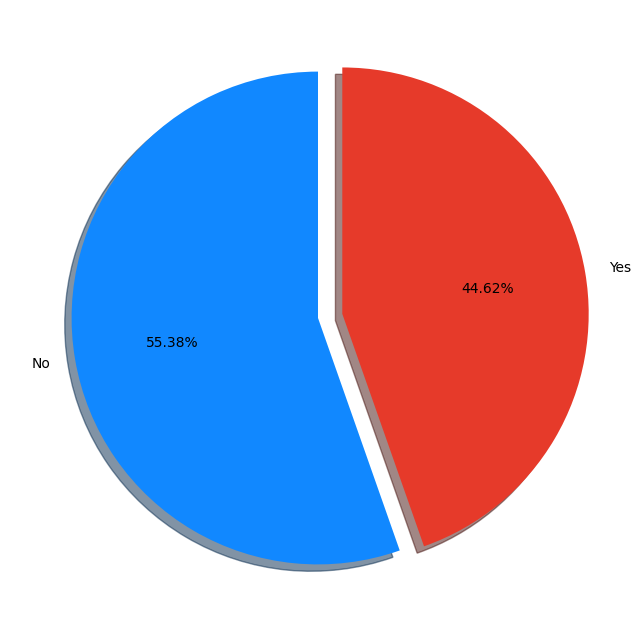

In [50]:
percentage=df.recommended.value_counts(normalize=True)*100
labels=["No","Yes"]
fig,ax=plt.subplots(figsize=(15,8))
explode=(0,0.1)
colors=['#1188ff','#e63a2a']
ax.pie(percentage,labels=labels,startangle=90,autopct='%1.2f%%',explode=explode,shadow=True,colors=colors)
plt.show()

In [51]:
df.head(1)

,airline,overall,cabin,seat_comfort,cabin_service,food_bev,value_for_money,recommended,sentiment_score
1,Turkish Airlines,7.0,Economy Class,4.0,5.0,4.0,4.0,yes,0.260263


Does airline has any impact on recommended


In [52]:
df.groupby('airline')['recommended'].value_counts(normalize=True).to_frame()*100

proportion
airline                   recommended            
Aegean Airlines           yes           78.679245
                          no            21.320755
Aeroflot Russian Airlines yes           62.674651
                          no            37.325349
Aeromexico                no            60.411899
                          yes           39.588101
Air Canada                no            61.792453
                          yes           38.207547
Air New Zealand           yes           54.440789
                          no            45.559211
Alitalia                  no            60.987654
                          yes           39.012346
American Airlines         no            80.604357
                          yes           19.395643
Delta Air Lines           no            61.042345
                          yes           38.957655
Emirates                  yes           53.545094
                          no            46.454906
Jetblue Airways           no            58.566978
                          yes           41.433022
KLM Royal Dutch Airlines  yes           63.880289
                          no            36.119711
Lufthansa                 yes           70.021413
                          no            29.978587
Qatar Airways             yes           76.993007
                          no            23.006993
Southwest Airlines        no            55.555556
                          yes           44.444444
Turkish Airlines          no            50.879567
                          yes           49.120433
United Airlines           no            79.055516
                          yes           20.944484
Virgin America            yes           60.645161
                          no            39.354839

In [53]:
df2=df.copy()

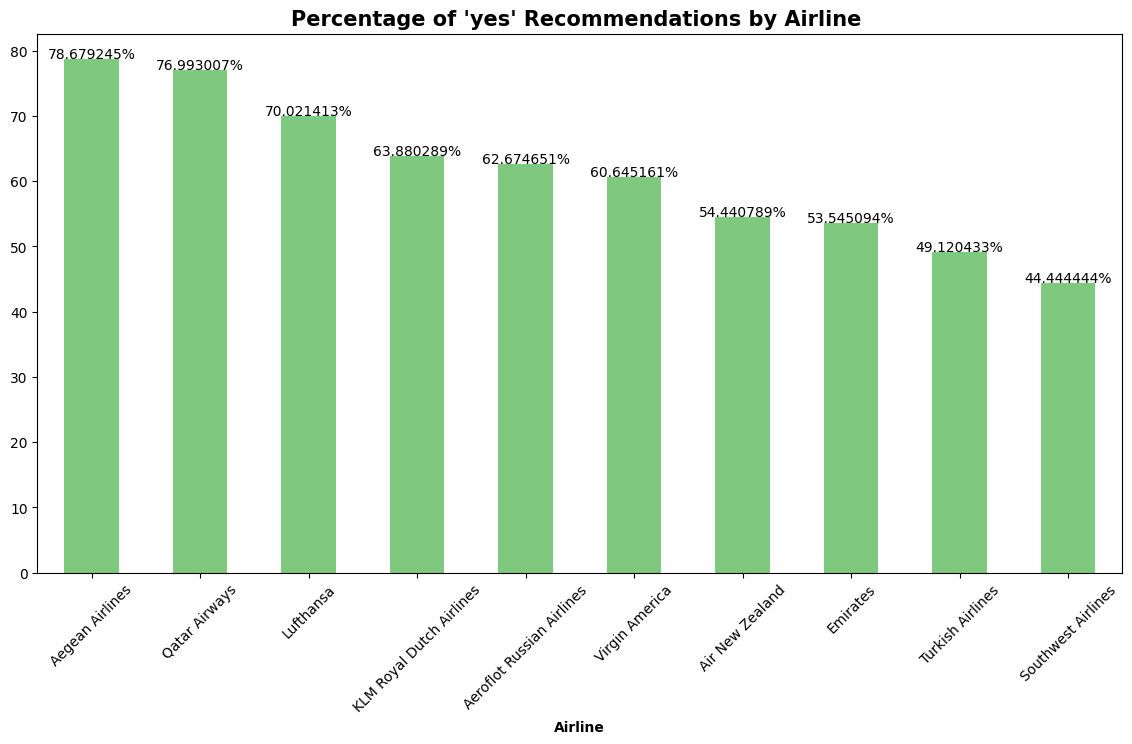

In [54]:
plt.figure(figsize=[14,7])
order1=100*df2[df2['recommended']=='yes']['airline'].value_counts()/df2['airline'].value_counts()
order1_sorted=order1.sort_values(ascending=False).head(10)
order1_sorted.plot(kind='bar',stacked=True,colormap='Accent')
plt.title("Percentage of 'yes' Recommendations by Airline ", fontsize=15,fontweight='bold')
for n in range(order1_sorted.shape[0]):
    count=order1_sorted.iloc[n]
    strt='{0:1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')
plt.xlabel("Airline",fontweight='bold')
plt.xticks(rotation=45)
plt.show()

4.3 Does overall has any impact on recommended?


In [56]:
df.groupby('overall')['recommended'].value_counts(normalize=True).to_frame()*100

proportion
overall   recommended            
1.000000  no            99.471086
          yes            0.528914
2.000000  no            97.864583
          yes            2.135417
3.000000  no            96.181384
          yes            3.818616
4.000000  no            85.326757
          yes           14.673243
4.986561  no            99.681529
          yes            0.318471
5.000000  no            66.459627
          yes           33.540373
6.000000  yes           64.435696
          no            35.564304
7.000000  yes           90.266876
          no             9.733124
8.000000  yes           96.234310
          no             3.765690
9.000000  yes           96.736597
          no             3.263403
10.000000 yes           97.947425
          no             2.052575

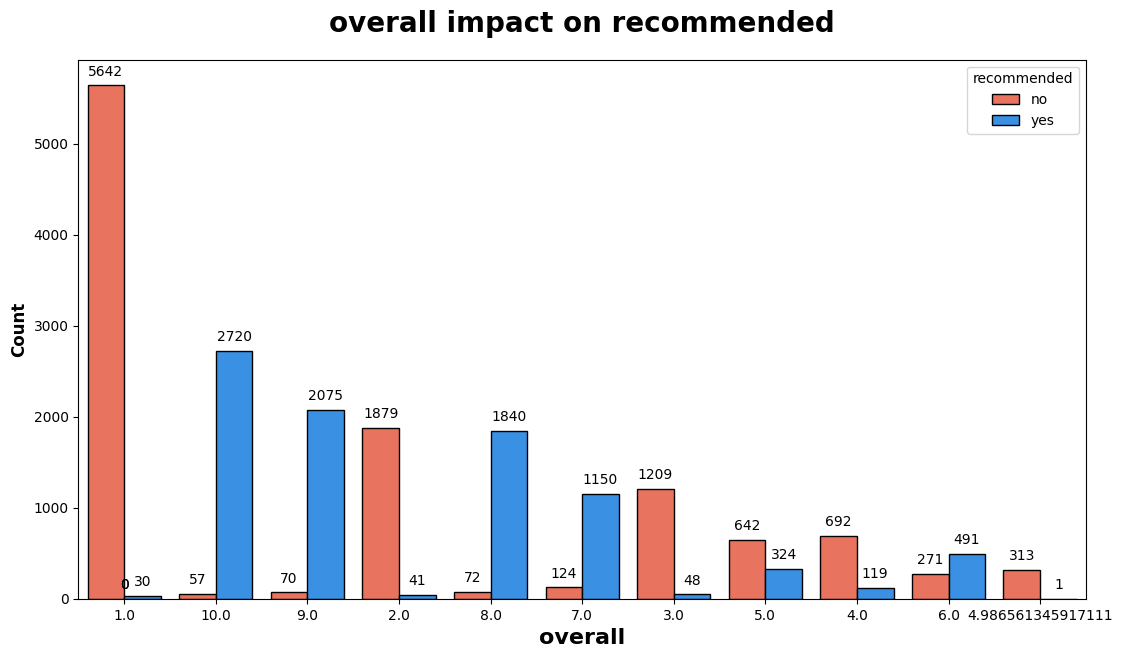

In [77]:
custom_palette = ['#FF6347', '#1E90FF']  
overall_order = df['overall'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(13, 7))
ax = sns.countplot(x="overall", hue="recommended", data=df, ec="black", palette=custom_palette,order=overall_order)
plt.title("overall impact on recommended", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("overall", weight="bold", fontsize=16)
plt.legend(title="recommended", fancybox=True)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.show()

In [58]:
df.head(1)


,airline,overall,cabin,seat_comfort,cabin_service,food_bev,value_for_money,recommended,sentiment_score
1,Turkish Airlines,7.0,Economy Class,4.0,5.0,4.0,4.0,yes,0.260263


4.4 Does cabin has impact on recommended ?

In [59]:
df.groupby('cabin')['recommended'].value_counts(normalize=True).to_frame()*100

proportion
cabin           recommended            
Business Class  yes           66.698504
                no            33.301496
Economy Class   no            60.638863
                yes           39.361137
First Class     yes           54.749340
                no            45.250660
Premium Economy no            52.872216
                yes           47.127784

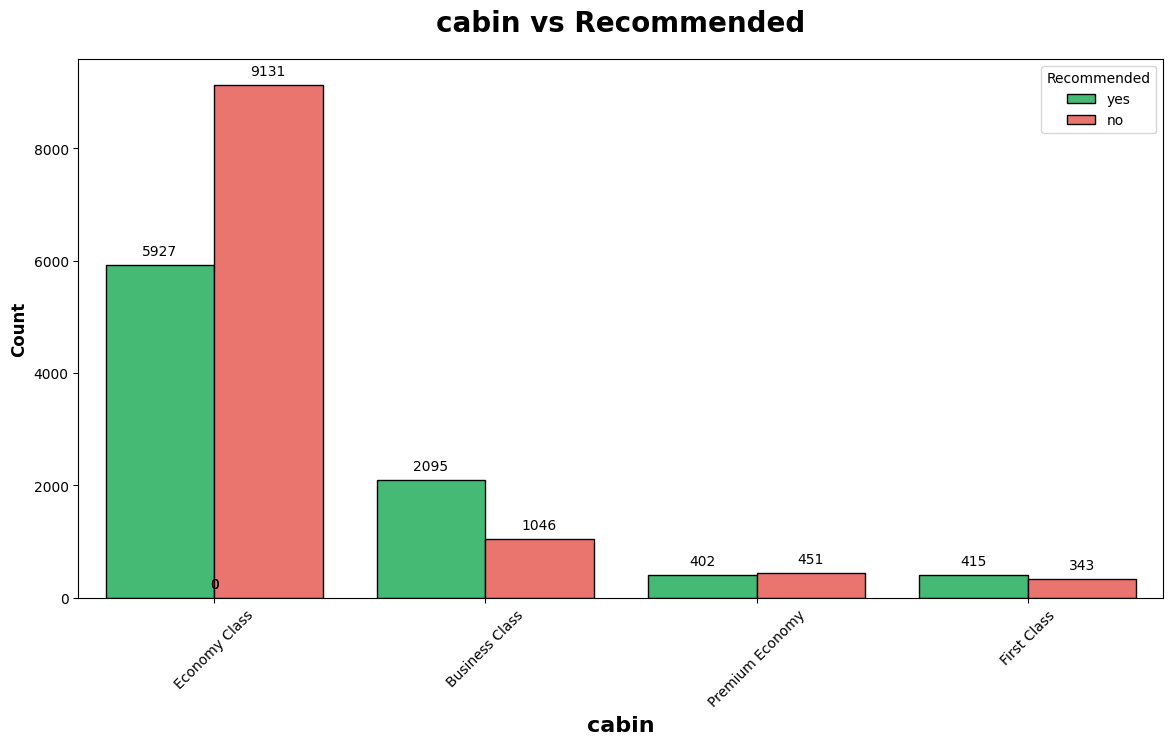

In [78]:
airline_order = df['cabin'].value_counts().index
custom_palette = {'yes': '#32CD72', 'no': '#FF6359'}
plt.subplots(figsize=(14, 7))
ax = sns.countplot(x="cabin", hue="recommended", data=df, ec="black", palette=custom_palette, order=airline_order)
plt.title("cabin vs Recommended", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("cabin", weight="bold", fontsize=16)
plt.legend(title="Recommended", fancybox=True)
for p in ax.patches:
    height = p.get_height()  
    ax.annotate(format(height, '.0f'),  
                (p.get_x() + p.get_width() / 2., height),  
                ha='center', va='center', 
                xytext=(0, 10),  
                textcoords='offset points')  
plt.xticks(rotation=45)  
plt.show()

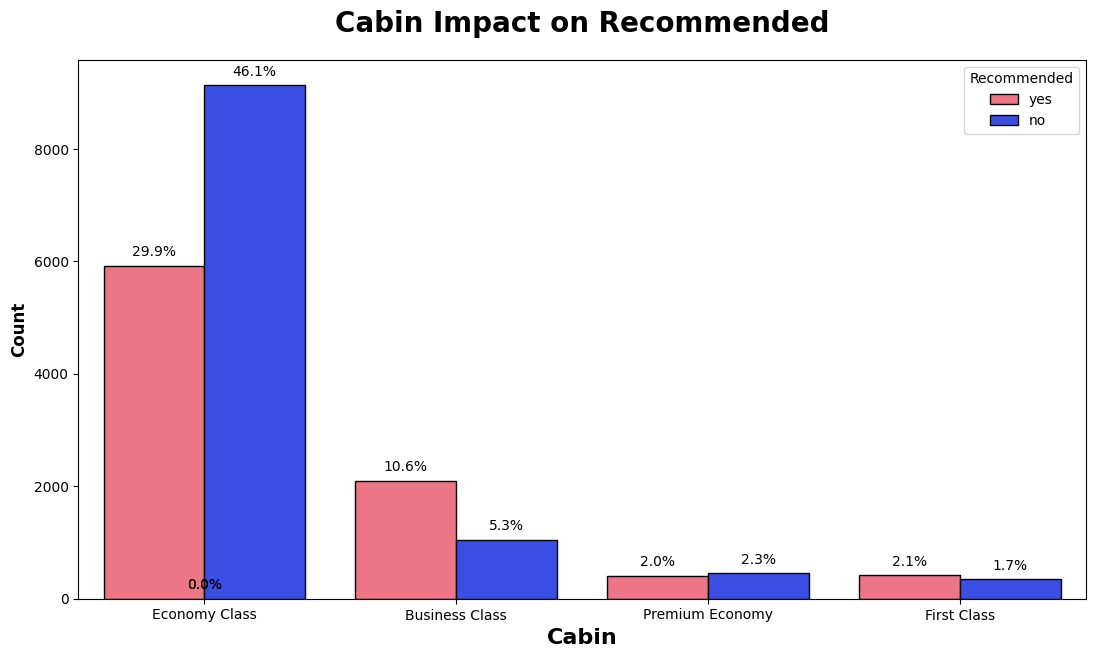

In [79]:
custom_palette = {'yes': '#FF6377', 'no': '#1E38FF'}
cabin_order = df['cabin'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(13, 7))
ax = sns.countplot(x="cabin", hue="recommended", data=df, ec="black", palette=custom_palette, order=cabin_order)
plt.title("Cabin Impact on Recommended", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Cabin", weight="bold", fontsize=16)
plt.legend(title="Recommended", fancybox=True)
total_count = len(df) 
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total_count) * 100
    ax.annotate(f'{percentage:0.1f}%',  
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.show()

4.5 Does seat_comfort has impact on recommended ?

In [62]:
df.groupby('seat_comfort')['recommended'].value_counts(normalize=True).to_frame()*100

proportion
seat_comfort recommended            
1.000000     no            96.520963
             yes            3.479037
2.000000     no            86.614173
             yes           13.385827
2.975201     no            79.035088
             yes           20.964912
3.000000     no            60.752401
             yes           39.247599
4.000000     yes           79.107551
             no            20.892449
5.000000     yes           92.884446
             no             7.115554

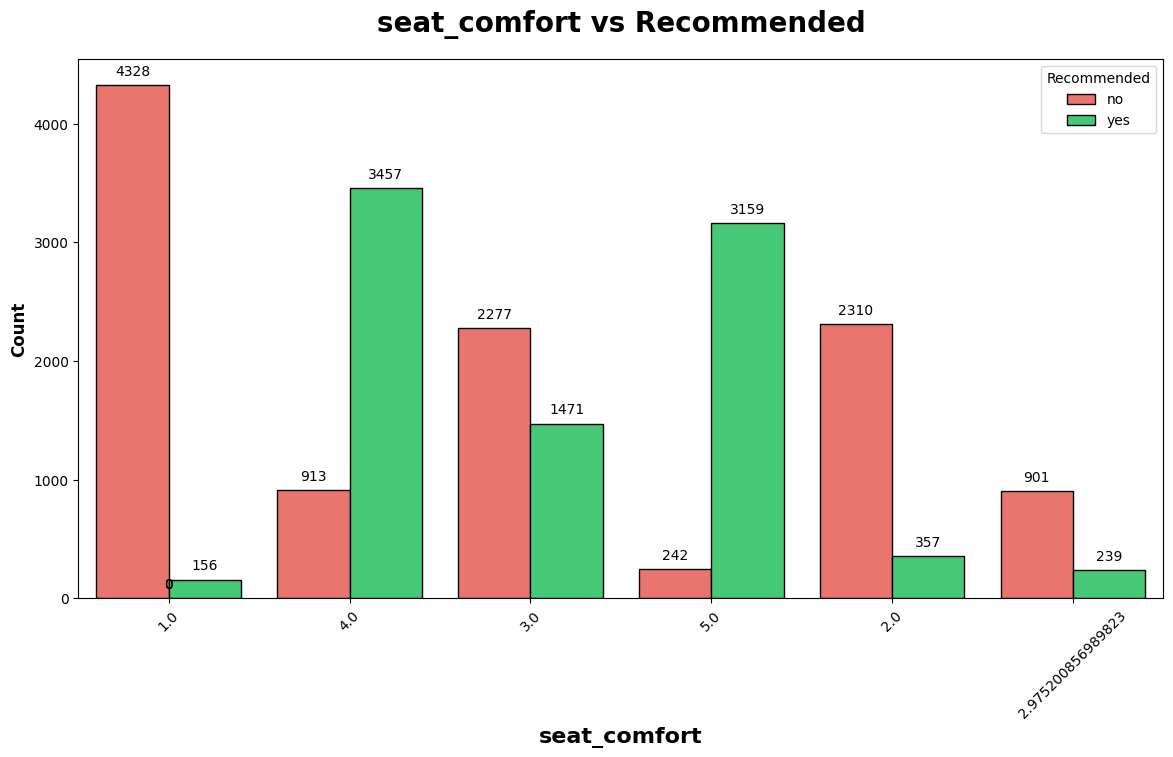

In [80]:
airline_order = df['seat_comfort'].value_counts().index
custom_palette = {'yes': '#32DD72', 'no': '#FF6359'}  
plt.subplots(figsize=(14, 7))
ax = sns.countplot(x="seat_comfort", hue="recommended", data=df, ec="black", palette=custom_palette, order=airline_order)
plt.title("seat_comfort vs Recommended", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("seat_comfort", weight="bold", fontsize=16)
plt.legend(title="Recommended", fancybox=True)
for p in ax.patches:
    height = p.get_height()  
    ax.annotate(format(height, '.0f'), 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 10),  
                textcoords='offset points')  

plt.xticks(rotation=45)  
plt.show()

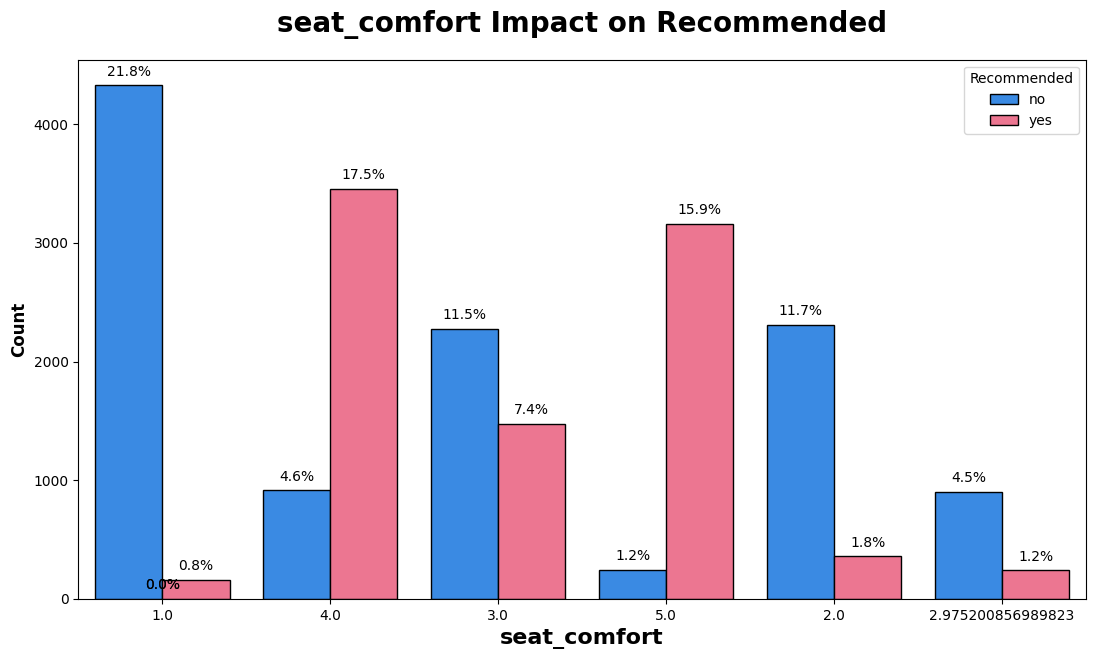

In [ ]:
custom_palette = {'yes': '#FF6387', 'no': '#1E88FF'} 
cabin_order = df['seat_comfort'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(13, 7))
ax = sns.countplot(x="seat_comfort", hue="recommended", data=df, ec="black", palette=custom_palette, order=cabin_order)
plt.title("seat_comfort Impact on Recommended", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("seat_comfort", weight="bold", fontsize=16)
plt.legend(title="Recommended", fancybox=True)
total_count = len(df)
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total_count) * 100
    ax.annotate(f'{percentage:0.1f}%', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.show()

4.6 Does cabin_service has impact on recommended ?

In [65]:
df.groupby('cabin_service')['recommended'].value_counts(normalize=True).to_frame()*100

proportion
cabin_service recommended            
1.000000      no            97.737557
              yes            2.262443
2.000000      no            89.107143
              yes           10.892857
3.000000      no            72.150971
              yes           27.849029
3.166738      no            79.055258
              yes           20.944742
4.000000      yes           67.339397
              no            32.660603
5.000000      yes           92.194245
              no             7.805755

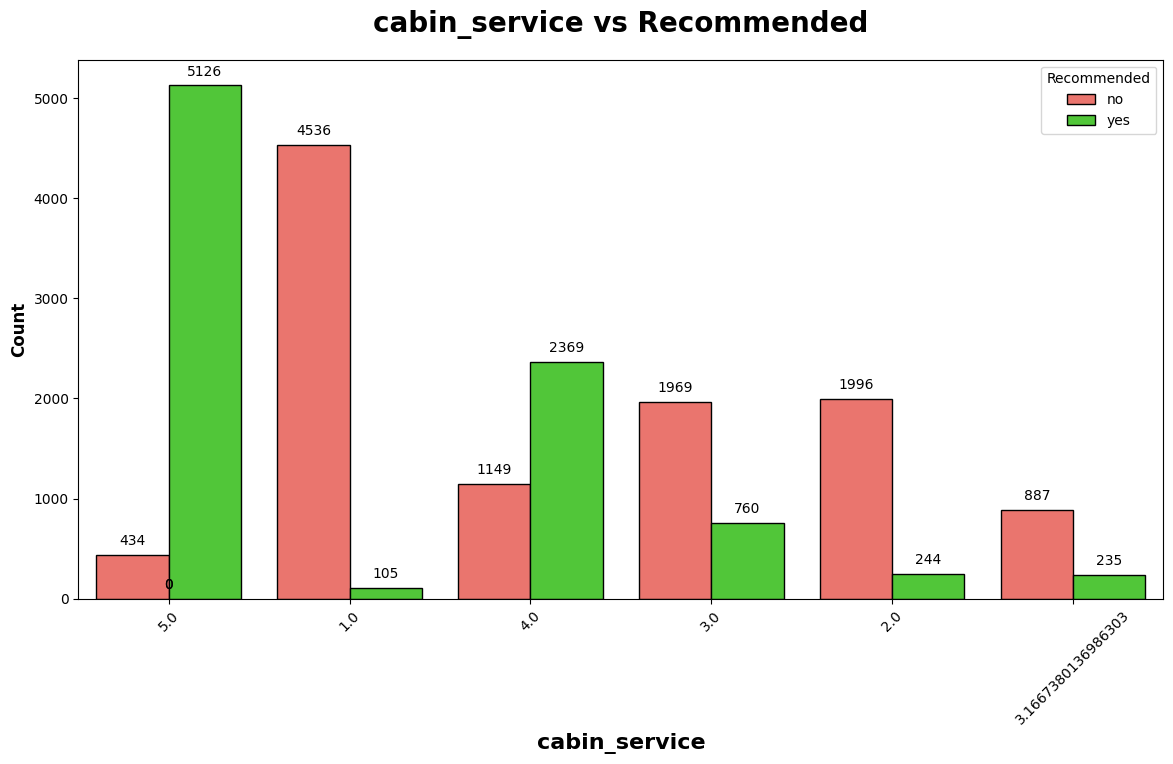

In [81]:
airline_order = df['cabin_service'].value_counts().index
custom_palette = {'yes': '#42DD22', 'no': '#FF6359'}  
plt.subplots(figsize=(14, 7))
ax = sns.countplot(x="cabin_service", hue="recommended", data=df, ec="black", palette=custom_palette, order=airline_order)
plt.title("cabin_service vs Recommended", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("cabin_service", weight="bold", fontsize=16)
plt.legend(title="Recommended", fancybox=True)
for p in ax.patches:
    height = p.get_height()  
    ax.annotate(format(height, '.0f'),  
                (p.get_x() + p.get_width() / 2., height),  
                ha='center', va='center',  
                xytext=(0, 10),  
                textcoords='offset points')  

plt.xticks(rotation=45) 
plt.show()

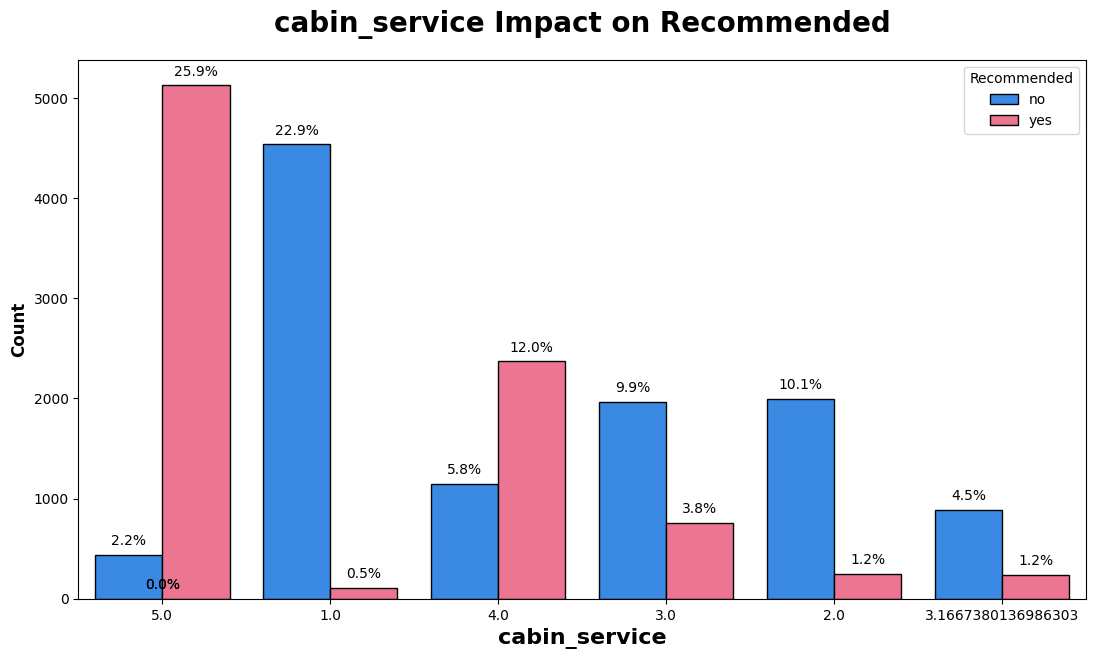

In [82]:
custom_palette = {'yes': '#FF6387', 'no': '#1E88FF'}  
cabin_order = df["cabin_service"].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(13, 7))
ax = sns.countplot(x="cabin_service", hue="recommended", data=df, ec="black", palette=custom_palette, order=cabin_order)
plt.title("cabin_service Impact on Recommended", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("cabin_service", weight="bold", fontsize=16)
plt.legend(title="Recommended", fancybox=True)
total_count = len(df) 
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total_count) * 100
    ax.annotate(f'{percentage:0.1f}%',  
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.show()

4.7 Does food_bev has impact on recommended ?

In [68]:
df.groupby('food_bev')['recommended'].value_counts(normalize=True).to_frame()*100

proportion
food_bev recommended            
1.000000 no            94.749125
         yes            5.250875
2.000000 no            80.102916
         yes           19.897084
2.972088 no            83.143878
         yes           16.856122
3.000000 no            51.962025
         yes           48.037975
4.000000 yes           81.658508
         no            18.341492
5.000000 yes           94.139615
         no             5.860385

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, '1.0'),
  Text(1, 0, '5.0'),
  Text(2, 0, '4.0'),
  Text(3, 0, '3.0'),
  Text(4, 0, '2.9720877413185107'),
  Text(5, 0, '2.0')])

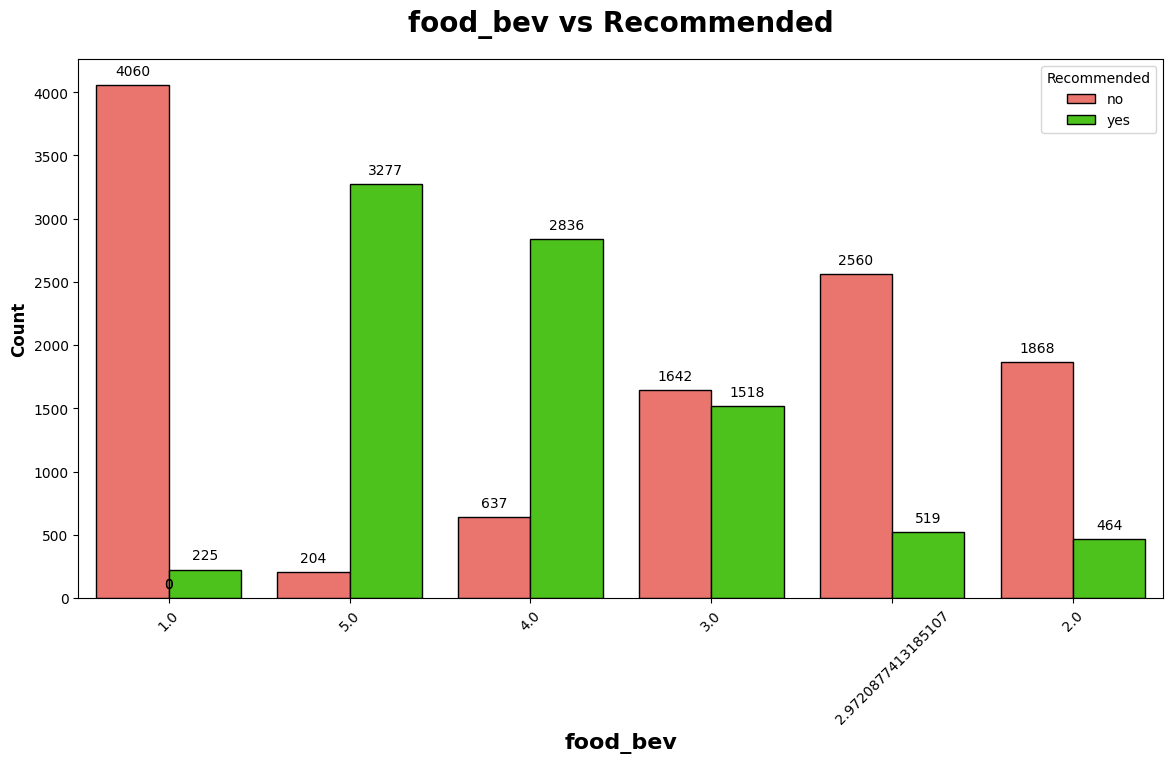

In [83]:
airline_order = df['food_bev'].value_counts().index
custom_palette = {'yes': '#42DD00', 'no': '#FF6359'} 
plt.subplots(figsize=(14, 7))
ax = sns.countplot(x="food_bev", hue="recommended", data=df, ec="black", palette=custom_palette, order=airline_order)
plt.title("food_bev vs Recommended", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("food_bev", weight="bold", fontsize=16)
plt.legend(title="Recommended", fancybox=True)
for p in ax.patches:
    height = p.get_height()  
    ax.annotate(format(height, '.0f'),  
                (p.get_x() + p.get_width() / 2., height),  
                ha='center', va='center',  
                xytext=(0, 10),  
                textcoords='offset points')  

plt.xticks(rotation=45)  

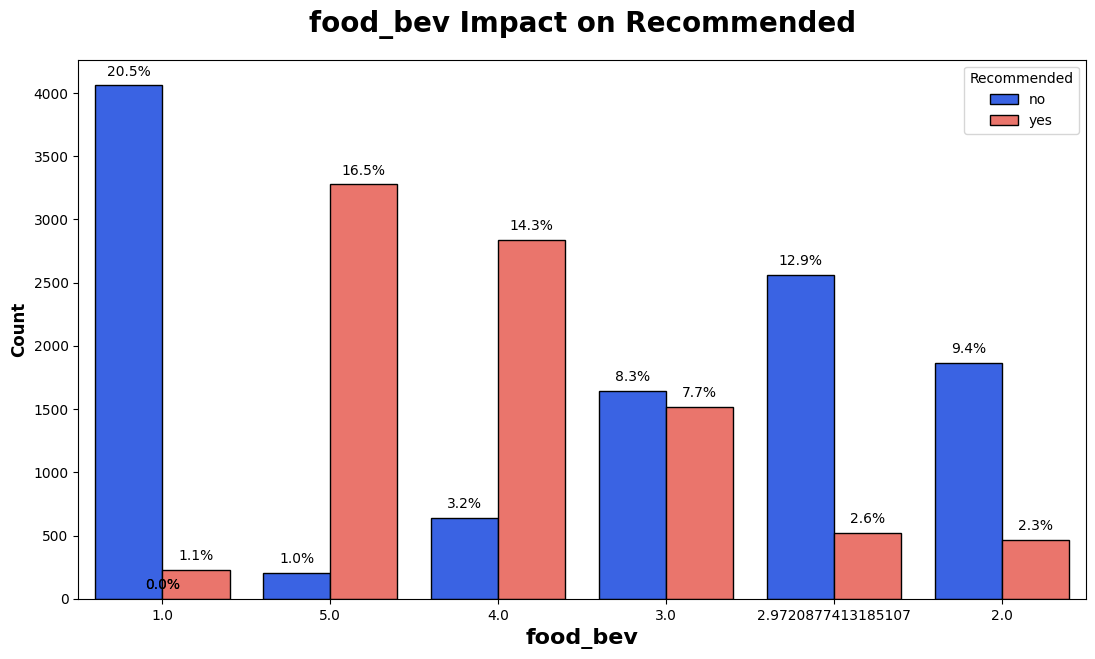

In [84]:
custom_palette = {'yes': '#FF6357', 'no': '#1E55FF'}  
cabin_order = df["food_bev"].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(13, 7))
ax = sns.countplot(x="food_bev", hue="recommended", data=df, ec="black", palette=custom_palette, order=cabin_order)
plt.title("food_bev Impact on Recommended", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("food_bev", weight="bold", fontsize=16)
plt.legend(title="Recommended", fancybox=True)
total_count = len(df)  
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total_count) * 100
    ax.annotate(f'{percentage:0.1f}%', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.show()

4.7 Does value_for_money has impact on recommended ?

In [71]:
df.groupby('value_for_money')['recommended'].value_counts(normalize=True).to_frame()*100

proportion
value_for_money recommended            
1.000000        no            99.146538
                yes            0.853462
2.000000        no            93.122597
                yes            6.877403
2.881561        no            99.119718
                yes            0.880282
3.000000        no            60.341556
                yes           39.658444
4.000000        yes           89.201102
                no            10.798898
5.000000        yes           97.989155
                no             2.010845

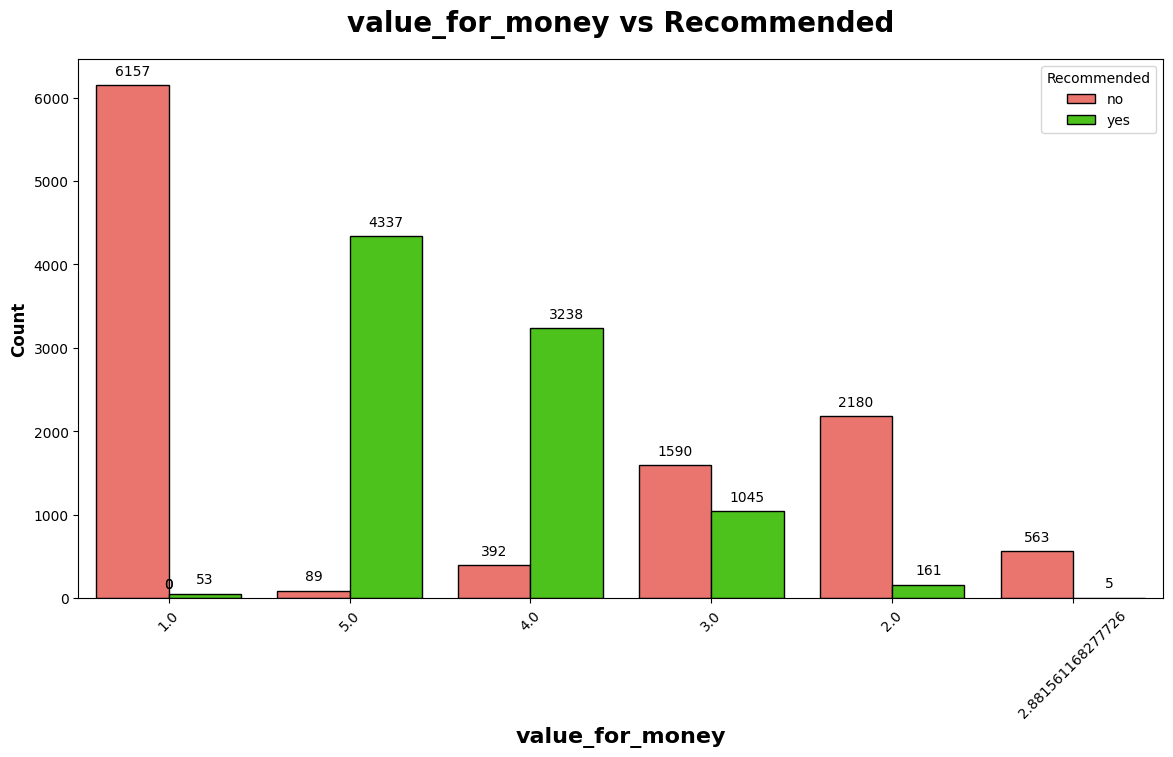

In [85]:
airline_order = df['value_for_money'].value_counts().index
custom_palette = {'yes': '#42DD00', 'no': '#FF6359'} 
plt.subplots(figsize=(14, 7))
ax = sns.countplot(x="value_for_money", hue="recommended", data=df, ec="black", palette=custom_palette, order=airline_order)
plt.title("value_for_money vs Recommended", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("value_for_money", weight="bold", fontsize=16)
plt.legend(title="Recommended", fancybox=True)
for p in ax.patches:
    height = p.get_height()  
    ax.annotate(format(height, '.0f'),  
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center',  
                xytext=(0, 10),  
                textcoords='offset points') 
plt.xticks(rotation=45)  
plt.show()

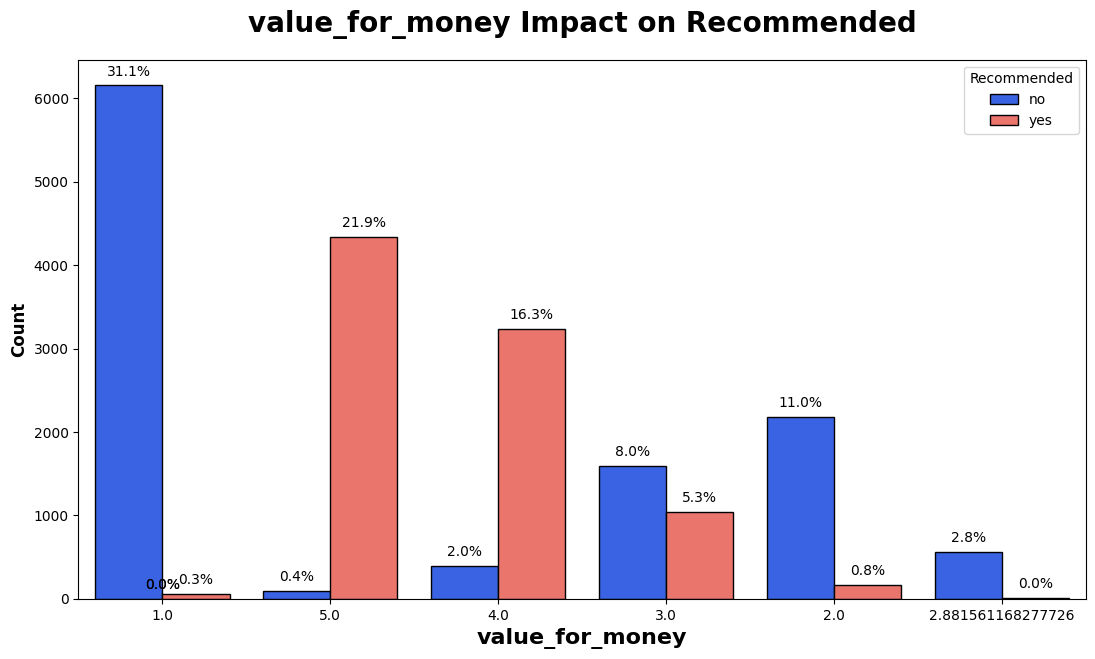

In [86]:
custom_palette = {'yes': '#FF6357', 'no': '#1E55FF'}  
cabin_order = df["value_for_money"].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(13, 7))
ax = sns.countplot(x="value_for_money", hue="recommended", data=df, ec="black", palette=custom_palette, order=cabin_order)
plt.title("value_for_money Impact on Recommended", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("value_for_money", weight="bold", fontsize=16)
plt.legend(title="Recommended", fancybox=True)
total_count = len(df)  
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total_count) * 100
    ax.annotate(f'{percentage:0.1f}%',  
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.show()

In [74]:
df.groupby('sentiment_score')['recommended'].value_counts(normalize=True).to_frame()*100

proportion
sentiment_score recommended            
-1.000000       no                 87.5
                yes                12.5
-0.900000       no                100.0
-0.775000       no                100.0
-0.766667       no                100.0
...                                 ...
 0.910000       yes               100.0
 0.938333       yes               100.0
 0.950000       yes               100.0
 0.953333       yes               100.0
 1.000000       yes               100.0

[16599 rows x 1 columns]

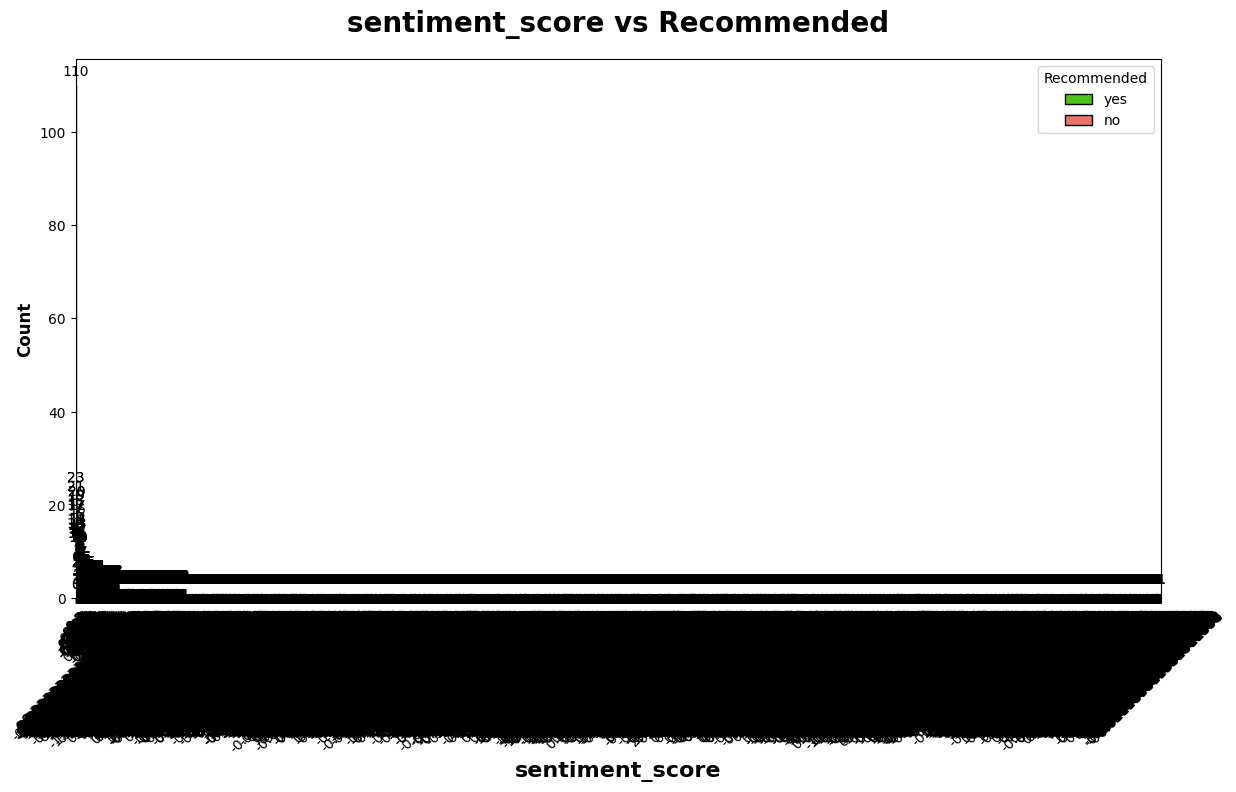

In [87]:
sentiment_score = df['sentiment_score'].value_counts().sort_values(ascending=False).index
custom_palette = {'yes': '#42DD00', 'no': '#FF6359'}  
plt.subplots(figsize=(14, 7))
ax = sns.countplot(x="sentiment_score", hue="recommended", data=df, ec="black", palette=custom_palette, order=sentiment_score)
plt.title("sentiment_score vs Recommended", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("sentiment_score", weight="bold", fontsize=16)
plt.legend(title="Recommended", fancybox=True)
for p in ax.patches:
    height = p.get_height()  
    ax.annotate(format(height, '.0f'),  
                (p.get_x() + p.get_width() / 2., height),  
                ha='center', va='center',  
                xytext=(0, 10),  
                textcoords='offset points')  

plt.xticks(rotation=45) 
plt.show()

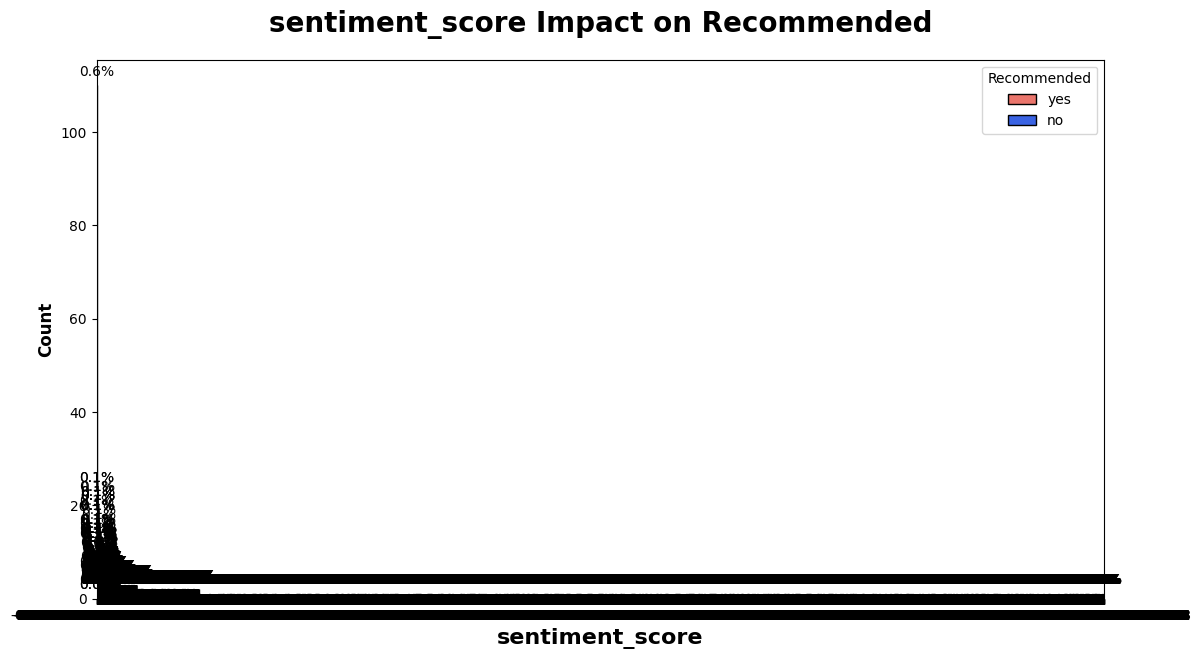

In [ ]:
custom_palette = {'yes': '#FF6357', 'no': '#1E55FF'}  
cabin_order = df["sentiment_score"].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(13, 7))
ax = sns.countplot(x="sentiment_score", hue="recommended", data=df, ec="black", palette=custom_palette, order=cabin_order)
plt.title("sentiment_score Impact on Recommended", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("sentiment_score", weight="bold", fontsize=16)
plt.legend(title="Recommended", fancybox=True)
total_count = len(df) 
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total_count) * 100
    ax.annotate(f'{percentage:0.1f}%',  
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.show()